<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Building-a-Content-Based-Movie-Recommender-System/blob/master/building_a_content_based_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5">CONTENT-BASED FILTERING</font></h1>

Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous, and can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore Content-based recommendation systems and implement a simple version of one using Python and the Pandas library.

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

### Saving the raw files from github


### Reading the data to the data frame

In [422]:
df = pd.read_csv("https://raw.githubusercontent.com/C241-PR543-team/machine-learning/master/destinasi-wisata-indonesia.csv", sep=';')
df['Rating'] = df['Rating']/10

In [423]:
ratings_df = pd.read_csv("https://raw.githubusercontent.com/C241-PR543-team/machine-learning/master/Dataset./tourism_rating.csv", sep=';')

In [424]:
print('Ratings_df Shape:',ratings_df.shape)
ratings_df

Ratings_df Shape: (10000, 3)


,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [425]:
import re

places = {}

with open('/content/places.txt', 'r') as file:
    for line in file:
        matches = re.split(r'\s*:\s*', line.strip())
        # Cek split berhasil atau tidak
        if len(matches) == 2:
            key = matches[0]
            value = matches[1].split(',')
            if len(value) > 1:
                value = [re.sub(r'\s+', ' ', v.strip()) for v in value]
            places[key] = value
        else:
            print(f"Invalid input format: {line}")
print(places)

{'Monumen Nasional': ['Budaya', 'Keluarga'], 'Kota Tua': ['Budaya'], 'Dunia Fantasi': ['Hiburan', 'Keluarga'], 'Taman Mini Indonesia Indah (TMII)': ['Budaya', 'Hiburan'], 'Atlantis Water Adventure': ['Petualangan', 'Hiburan'], 'Taman Impian Jaya Ancol': ['Hiburan', 'Keluarga'], 'Kebun Binatang Ragunan': ['Keluarga', 'Alam'], 'Ocean Ecopark': ['Petualangan', 'Alam'], 'Pelabuhan Marina': ['Hiburan', 'Alam'], 'Pulau Tidung': ['Alam', 'Petualangan'], 'Pulau Bidadari': ['Alam', 'Romantis'], 'Pulau Pari': ['Alam', 'Petualangan'], 'Pulau Pramuka': ['Alam', 'Petualangan'], 'Pulau Pelangi': ['Alam', 'Romantis'], 'Pasar Seni': ['Budaya', 'Hiburan'], 'Jembatan Kota Intan': ['Budaya'], 'Museum Fatahillah': ['Budaya'], 'Museum Bank Indonesia': ['Budaya'], 'Kidzania': ['Hiburan', 'Keluarga'], 'Museum Taman Prasasti': ['Budaya'], 'Museum Wayang': ['Budaya'], 'Masjid Istiqlal': ['Budaya'], 'Gereja Katedral': ['Budaya'], 'Museum Nasional': ['Budaya'], 'Pasar Tanah Abang': ['Budaya'], 'Pecinan Glodok': 

In [426]:
# New category
for index, row in df.iterrows():
    name = row['Place_Name']
    df['Category'] = df.apply(lambda row: places[row['Place_Name']] if row['Place_Name'] in places else None, axis=1)
    #df["Category"] = df["Category"].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [429]:
df.iloc[df.index[df['Category'].isna()]]
df = df.dropna(subset=['Category'])

In [428]:
df = df[["Place_Id", "Place_Name", "Category", "Rating"]]

In [430]:
df

,Place_Id,Place_Name,Category,Rating
0,1,Monumen Nasional,"[Budaya, Keluarga]",4.6
1,2,Kota Tua,[Budaya],4.6
2,3,Dunia Fantasi,"[Hiburan, Keluarga]",4.6
3,4,Taman Mini Indonesia Indah (TMII),"[Budaya, Hiburan]",4.5
4,5,Atlantis Water Adventure,"[Petualangan, Hiburan]",4.5
...,...,...,...,...
432,433,Museum Mpu Tantular,"[Sejarah, Budaya]",4.4
433,434,Taman Bungkul,"[Alam, Relaksasi]",4.6
434,435,Taman Air Mancur Menari Kenjeran,"[Alam, Hiburan]",4.4
435,436,Taman Flora Bratang Surabaya,"[Alam, Relaksasi]",4.6


Gunung Tangkuban Parahu

In [431]:
# # Example user ratings data
# user_ratings = ratings_df

# # Expanded place categories data
# place_data = df

# # Explode the categories into separate rows
# place_data_exploded = place_data.explode('Category')

# # Merging user ratings with place categories
# merged_data = pd.merge(user_ratings, place_data_exploded, on='Place_Id')

# # Pivoting data to get categories as columns
# pivot_data = merged_data.pivot_table(index='User_Id', columns='Category', values='Place_Ratings', aggfunc='mean').fillna(0)

# # Calculate rating count and average rating
# user_stats = merged_data.groupby('User_Id').agg(
#     rating_count=('Place_Ratings', 'count'),
#     rating_ave=('Place_Ratings', 'mean')
# ).reset_index()

# # Combining user statistics with pivot data
# final_data = pd.merge(user_stats, pivot_data, on='User_Id').round(1)

# # Display the final dataframe
# final_data

,User_Id,rating_count,rating_ave,Alam,Belanja,Budaya,Edukasi,Hiburan,Keluarga,Kuliner,Makanan,Olahraga,Pemandangan,Petualangan,Relaksasi,Religius,Romantis,Sejarah,Seni
0,1,50,3.3,3.2,0.0,3.4,0.0,3.4,4.0,0.0,0.0,0.0,5.0,3.3,3.3,2.0,2.0,3.0,0.0
1,2,49,3.1,2.8,0.0,3.5,3.5,3.5,3.0,0.0,0.0,0.0,2.0,2.5,3.4,4.5,2.0,3.5,2.0
2,3,49,3.4,3.9,0.0,3.3,2.5,2.8,3.0,2.0,0.0,0.0,0.0,4.2,3.5,0.0,4.3,3.0,0.0
3,4,37,3.5,3.4,0.0,3.2,3.0,4.0,2.0,0.0,0.0,0.0,0.0,4.7,2.5,4.0,5.0,0.0,3.0
4,5,59,3.3,3.4,0.0,3.5,3.5,3.3,3.0,0.0,0.0,0.0,0.0,4.0,2.9,0.0,2.0,3.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,58,3.0,3.1,0.0,2.9,3.5,3.0,2.9,0.0,2.0,3.5,4.0,2.0,2.7,3.3,3.3,0.0,0.0
296,297,63,3.3,3.2,0.0,2.8,0.0,3.3,4.0,0.0,0.0,5.0,0.0,3.5,2.7,3.0,4.0,3.7,0.0
297,298,51,3.6,3.4,0.0,4.1,0.0,4.0,4.7,0.0,0.0,0.0,0.0,4.2,3.2,2.0,3.0,4.0,0.0
298,299,66,2.6,2.1,0.0,3.2,3.0,2.8,2.9,3.0,0.0,0.0,0.0,2.6,1.2,4.0,3.0,1.5,3.0


In [433]:
import pandas as pd

# Example user ratings data
user_ratings = ratings_df

# Expanded place categories data
place_data = df

# Explode the categories into separate rows
place_data_exploded = place_data.explode('Category')

# Merging user ratings with place categories
merged_data = pd.merge(user_ratings, place_data_exploded, on='Place_Id')

# Pivoting data to get categories as columns
pivot_data = merged_data.pivot_table(index='User_Id', columns='Category', values='Place_Ratings', aggfunc='mean').fillna(0)

# Calculate rating count and average rating
user_stats = merged_data.groupby('User_Id').agg(
    rating_count=('Place_Ratings', 'count'),
    rating_ave=('Place_Ratings', 'mean')
).reset_index()

# Combining user statistics with pivot data
final_data = pd.merge(user_stats, pivot_data, on='User_Id').round(1)


# Get the count of unique places rated by each user
counts = ratings_df.groupby('User_Id')['Place_Id'].nunique()

# Duplicate rows based on the count of places rated by each user
df_duplicated = final_data.loc[final_data.index.repeat(counts)].reset_index(drop=True)
df_duplicated_shuffled = df_duplicated.sample(frac=1).reset_index(drop=True)
df_duplicated_shuffled

,User_Id,rating_count,rating_ave,Alam,Belanja,Budaya,Edukasi,Hiburan,Keluarga,Kuliner,Makanan,Olahraga,Pemandangan,Petualangan,Relaksasi,Religius,Romantis,Sejarah,Seni
0,267,90,2.9,2.5,0.0,3.2,1.3,3.3,4.0,1.0,1.0,0.0,0.0,2.8,2.4,2.0,1.7,3.4,0.0
1,195,66,2.8,2.8,5.0,2.9,0.0,3.4,3.0,0.0,0.0,3.0,0.0,2.7,3.3,1.5,2.0,1.0,0.0
2,18,58,3.6,3.7,5.0,3.3,0.0,4.2,4.3,0.0,0.0,0.0,5.0,4.0,3.4,2.0,3.2,2.3,0.0
3,111,43,3.4,3.8,0.0,3.1,0.0,2.5,0.0,0.0,0.0,1.0,0.0,3.6,4.0,4.0,5.0,2.3,0.0
4,81,37,2.5,2.6,0.0,2.4,0.0,2.0,1.5,0.0,0.0,0.0,5.0,2.2,0.0,3.7,2.3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,89,50,2.9,2.8,0.0,3.2,0.0,2.5,4.0,4.0,0.0,0.0,0.0,3.2,1.8,0.0,3.5,3.0,0.0
9593,91,74,3.0,3.1,0.0,3.1,2.0,2.0,2.4,0.0,0.0,0.0,1.5,3.4,3.9,4.0,2.5,2.0,0.0
9594,240,61,2.9,2.8,0.0,3.5,0.0,2.3,2.0,0.0,0.0,0.0,5.0,3.2,2.4,4.0,1.8,3.3,4.0
9595,141,49,3.2,3.3,0.0,3.5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.9,2.4,4.0,2.8,0.0,0.0


In [434]:
ratings_df.duplicated().sum()

79

In [435]:
ratings_df.drop_duplicates(inplace=True)

In [436]:
ratings_df.shape[0]

9921

In [437]:
# # Group by both User_Id and Place_Id and count the occurrences
# ratings_counts = ratings_df.groupby(['User_Id', 'Place_Id']).size().reset_index(name='Rating_Counts')

# # Filter the groups where the count of ratings is greater than 1
# duplicated_ratings = ratings_counts[ratings_counts['Rating_Counts'] > 1]

# # Display the duplicated ratings
# print(duplicated_ratings)

      User_Id  Place_Id  Rating_Counts
42          2       208              2
55          2       437              2
73          3       202              2
171         7        77              2
178         7       183              2
...       ...       ...            ...
9502      297       418              2
9522      298       240              2
9560      299       290              2
9569      299       407              2
9575      300        69              3

[319 rows x 3 columns]


In [438]:
ratings_df = ratings_df.groupby(['User_Id', 'Place_Id'])['Place_Ratings'].mean().reset_index(name='Average_Rating').round(0)
sum(ratings_df.groupby('User_Id')['Place_Id'].nunique())

9597

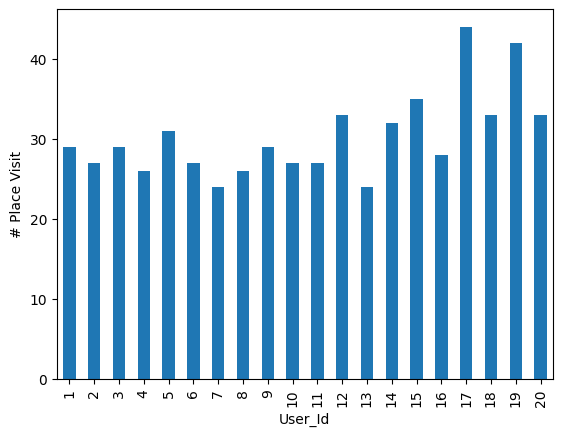

In [440]:
counts = ratings_df.groupby('User_Id')['Place_Id'].nunique()[:20]

counts.plot(kind='bar')
plt.xlabel('User_Id')
plt.ylabel('# Place Visit')
plt.show()

### Explore and prepare the places in df

In [445]:
# First let's make a copy of the df
places_category = df.copy(deep=True)

# Let's iterate through df, then append the places category as columns of 1s or 0s.
# 1 if that column contains places in the category at the present index and 0 if not.

x = []
for index, row in df.iterrows():
    x.append(index)
    for genre in row['Category']:
        places_category.at[index, genre] = 1

# Confirm that every row has been iterated and acted upon
print(len(x) == len(df))
places_category.head()

True


,Place_Id,Place_Name,Category,Rating,Budaya,Keluarga,Hiburan,Petualangan,Alam,Romantis,Makanan,Relaksasi,Belanja,Olahraga,Religius,Edukasi,Kuliner,Sejarah,Seni,Pemandangan
0,1,Monumen Nasional,"[Budaya, Keluarga]",4.6,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Kota Tua,[Budaya],4.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Dunia Fantasi,"[Hiburan, Keluarga]",4.6,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Taman Mini Indonesia Indah (TMII),"[Budaya, Hiburan]",4.5,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Atlantis Water Adventure,"[Petualangan, Hiburan]",4.5,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [446]:
#Filling in the NaN values with 0 to show that a place doesn't have that column's category
places_category = places_category.fillna(0)
sorted_columns = sorted(places_category.columns[4:])
places_category = places_category.reindex(columns=places_category.columns[:4].tolist() + sorted_columns)
places_category.head()

,Place_Id,Place_Name,Category,Rating,Alam,Belanja,Budaya,Edukasi,Hiburan,Keluarga,Kuliner,Makanan,Olahraga,Pemandangan,Petualangan,Relaksasi,Religius,Romantis,Sejarah,Seni
0,1,Monumen Nasional,"[Budaya, Keluarga]",4.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Kota Tua,[Budaya],4.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Dunia Fantasi,"[Hiburan, Keluarga]",4.6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Taman Mini Indonesia Indah (TMII),"[Budaya, Hiburan]",4.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Atlantis Water Adventure,"[Petualangan, Hiburan]",4.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [447]:
# Get the count of unique places rated by each user
places_count = ratings_df.groupby('Place_Id')['User_Id'].nunique()

# Duplicate rows based on the count of places rated by each user
places_duplicated = places_category.loc[places_category.index.repeat(places_count)].reset_index(drop=True)
places_duplicated_shuffled = places_duplicated.sample(frac=1).reset_index(drop=True)
places_duplicated_shuffled

,Place_Id,Place_Name,Category,Rating,Alam,Belanja,Budaya,Edukasi,Hiburan,Keluarga,Kuliner,Makanan,Olahraga,Pemandangan,Petualangan,Relaksasi,Religius,Romantis,Sejarah,Seni
0,20,Museum Taman Prasasti,[Budaya],4.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,145,Desa Wisata Rumah Domes/Teletubbies,"[Alam, Keluarga]",4.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61,Tugu Proklamasi,[Budaya],4.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,387,Obyek Wisata Goa Kreo,"[Alam, Petualangan]",4.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,168,Pantai Timang,"[Alam, Petualangan]",4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,333,Kota Mini,"[Hiburan, Keluarga]",4.4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9593,118,Museum Sonobudoyo Unit I,[Budaya],4.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9594,61,Tugu Proklamasi,[Budaya],4.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9595,210,Pantai Congot,"[Alam, Romantis]",4.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Build and Train Model

In [448]:
y_train = np.array(ratings_df['Average_Rating'])

In [449]:
user_train = df_duplicated_shuffled
scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

item_train = places_duplicated_shuffled.drop(['Place_Name', 'Category'], axis=1)
scalerItem = StandardScaler()
scalerItem.fit(item_train)
item_train = scalerItem.transform(item_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.reshape(-1, 1))

In [450]:
num_user_features = user_train.shape[1] - 3
num_item_features = item_train.shape[1] - 1

In [451]:
item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"place/item training data shape: {item_train.shape}")
print(f"place/item test data shape: {item_test.shape}")

place/item training data shape: (7677, 18)
place/item test data shape: (1920, 18)


In [488]:
num_outputs = 32
user_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
    ### END CODE HERE ###
])

item_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
    ### END CODE HERE ###
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 16)]                 0         []                            
                                                                                                  
 input_28 (InputLayer)       [(None, 17)]                 0         []                            
                                                                                                  
 sequential_26 (Sequential)  (None, 32)                   41376     ['input_27[0][0]']            
                                                                                                  
 sequential_27 (Sequential)  (None, 32)                   41632     ['input_28[0][0]']            
                                                                                           

In [489]:
tf.random.set_seed(1)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError())

In [490]:
tf.random.set_seed(1)
model.fit([user_train[:, 3:], item_train[:, 1:]], y_train, epochs=50)

Epoch 1/50
240/240 [==============================] - 2s 3ms/step - loss: 0.4797
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4718
Epoch 3/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4711
Epoch 4/50
240/240 [==============================] - 1s 5ms/step - loss: 0.4672
Epoch 5/50
240/240 [==============================] - 1s 6ms/step - loss: 0.4675
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4670
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4645
Epoch 8/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4641
Epoch 9/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4630
Epoch 10/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4604
Epoch 11/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4594
Epoch 12/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4570
Epoch 13/50
240/240 [====

In [491]:
model.evaluate([user_test[:, 3:], item_test[:, 1:]], y_test)

60/60 [==============================] - 0s 2ms/step - loss: 0.5328


0.5328159928321838

### Predictions

In [498]:
new_user_id = 301
new_rating_ave = 0.0
new_alam = 0.0
new_belanja = 0.0
new_budaya = 0.0
new_edukasi = 0.0
new_hiburan = 5.0 # Misal preferensi user tinggi di kategori "Hiburan"
new_keluarga = 5.0 # dan "Keluarga"
new_kuliner = 0.0
new_makanan = 0.0
new_olahraga = 0.0
new_pemandangan = 0.0
new_petualangan = 0.0
new_relaksasi = 0.0
new_religius = 0.0
new_romantis = 0.0
new_sejarah = 0.0
new_seni = 0.0
new_rating_count = 2

user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave,
                      new_alam , new_belanja, new_budaya, new_edukasi,
                      new_hiburan, new_keluarga, new_kuliner, new_makanan,
                      new_olahraga, new_pemandangan, new_petualangan, new_relaksasi,
                      new_religius, new_romantis, new_sejarah, new_seni]])

In [493]:
item_vecs = places_category.drop(['Place_Name', 'Category'], axis=1)
item_vecs = np.array(item_vecs)

In [499]:
user_vecs = np.tile(user_vec, (len(item_vecs), 1))

In [501]:
# scale our user and item vectors
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)

# make a prediction
y_p = model.predict([suser_vecs[:, 3:], sitem_vecs[:,1:]])

# unscale y prediction
y_pu = scalerTarget.inverse_transform(y_p)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_vecs[sorted_index]  #using unscaled vectors for display

14/14 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [504]:
recommendation = sorted_items[0:9, 0].astype(int)
recommendation

array([ 54, 145, 151,  94,  85,   1, 223,   7, 170])

In [505]:
df.iloc[recommendation-1][['Place_Id', 'Place_Name', 'Category']]

,Place_Id,Place_Name,Category
53,54,Taman Agrowisata Cilangkap,"[Alam, Keluarga]"
144,145,Desa Wisata Rumah Domes/Teletubbies,"[Alam, Keluarga]"
150,151,Desa Wisata Kelor,"[Alam, Keluarga]"
93,94,Sumur Gumuling,"[Budaya, Relaksasi]"
84,85,Taman Pintar Yogyakarta,"[Budaya, Keluarga]"
0,1,Monumen Nasional,"[Budaya, Keluarga]"
222,223,Masjid Raya Bandung,"[Budaya, Keluarga]"
6,7,Kebun Binatang Ragunan,"[Keluarga, Alam]"
169,170,Candi Borobudur,"[Budaya, Relaksasi]"
